In [13]:
import pandas as pd
import numpy as np

In [93]:
df_orders = pd.read_csv('./data/Orders.csv')
#df_promo = pd.read_csv('./data/PromotionOrders.csv')

C:\Users\jestw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
print(df_orders.columns)
print("\n")
print(df_promo.columns)

Index(['DateId', 'MemberId', 'OrderGroupCode', 'TrackSourceTypeDef',
       'TrackDeviceTypeDef', 'PayProfileTypeDef', 'SalesOrderSlaveId',
       'SalePageId', 'IsMajor', 'IsGift', 'IsSalePageGift', 'Quantity',
       'UnitPrice', 'PromotionDiscount', 'ECouponId', 'ECouponDiscount',
       'SalesOrderSlaveTotalPayment', 'SalesOrderSlaveDateTime',
       'SalesOrderReceiverId', 'City', 'District', 'ZipCode', 'StoreName',
       'StoreId', 'DeliverTypeDef', 'StatusDef', 'ReturnGoodsDateId',
       'CauseDef'],
      dtype='object')


Index(['SalesOrderSlaveId', 'PromotionId', 'SalesOrderSlavePromotionDiscount',
       'SalesOrderSlavePromotionDiscountAllocated',
       'SalesOrderSlavePromotionDiscountAllocatedQty',
       'SalesOrderSlavePromotionDiscountRate', 'DiscountType',
       'PromotionCondition_DiscountPrice', 'PromotionCondition_DiscountRate',
       'PromotionCondition_TotalPrice', 'PromotionCondition_TotalQty',
       'PromotionStartDateTime', 'PromotionEndDateTime'],
     

In [10]:
df_promo['DiscountType'].unique()

array(['滿額折現', '滿件打折', '任選優惠價', '滿額贈', '會員滿額打折', '滿件折現', '滿額打折'], dtype=object)

In [77]:
df_promo = df_promo[(df_promo['DiscountType'] == '滿額折現') | (df_promo['DiscountType'] == '滿額打折')]

In [78]:
df_promo['PromotionCondition_TotalPrice'].unique()

array([ 1000.,   666.,  1200.,   299.,   899.,   800.,  1500.,   888.,
         399.,  1111.,   777.])

In [79]:
df_promo_tot = df_promo[df_promo['PromotionCondition_TotalPrice'].notnull()]
df_promo_tot.head()

,SalesOrderSlaveId,PromotionId,SalesOrderSlavePromotionDiscount,SalesOrderSlavePromotionDiscountAllocated,SalesOrderSlavePromotionDiscountAllocatedQty,SalesOrderSlavePromotionDiscountRate,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
0,40086585,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
1,40088089,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
2,40090756,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
3,40090763,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
4,40091003,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000


In [80]:
df_promo_tot = df_promo_tot[['SalesOrderSlaveId','DiscountType','PromotionCondition_TotalPrice']]
df_promo_tot.head()

,SalesOrderSlaveId,DiscountType,PromotionCondition_TotalPrice
0,40086585,滿額折現,1000.0
1,40088089,滿額折現,1000.0
2,40090756,滿額折現,1000.0
3,40090763,滿額折現,1000.0
4,40091003,滿額折現,1000.0


In [94]:
df_orders = df_orders[['OrderGroupCode','SalesOrderSlaveId','MemberId', 'Quantity','UnitPrice','SalesOrderSlaveTotalPayment','PromotionDiscount','StatusDef']]
df_orders.head()

,OrderGroupCode,SalesOrderSlaveId,MemberId,Quantity,UnitPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,StatusDef
0,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457777,1388133,1,350.0,350.0,0.0,Finish
1,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457778,1388133,1,199.0,199.0,0.0,Finish
2,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457779,1388133,1,199.0,199.0,0.0,Finish
3,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457780,1388133,1,225.0,225.0,0.0,Finish
4,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",4457791,365787,1,100.0,100.0,0.0,Finish


In [95]:
df = pd.merge(df_promo_tot,df_orders, how='left', on='SalesOrderSlaveId')
df.head()

,SalesOrderSlaveId,DiscountType,PromotionCondition_TotalPrice,OrderGroupCode,MemberId,Quantity,UnitPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,StatusDef
0,40086585,滿額折現,1000.0,b'!\x96P\x13\xc6\xed\xdb\xe7\xc7\x01\xefz\xe8\...,779715.0,1.0,320.0,308.0,-12.0,Cancel
1,40088089,滿額折現,1000.0,b'$\xf5LTr\x86\xaf\x1c\xbc\x8c\xed\xbcD\x9cw\x...,607036.0,1.0,180.0,168.0,-12.0,Finish
2,40090756,滿額折現,1000.0,b'\xbc\xcd\xc1rIU\xbc\x84\xaa[f\xc8\xf1\xdd\x8...,801590.0,1.0,199.0,187.0,-12.0,Cancel
3,40090763,滿額折現,1000.0,b'\xbc\xcd\xc1rIU\xbc\x84\xaa[f\xc8\xf1\xdd\x8...,801590.0,1.0,295.0,283.0,-12.0,Cancel
4,40091003,滿額折現,1000.0,b'\xca\xe2\xaa3m\xc6\xc0/\x8d\xb9\xaa\x9b\xff\...,32633.0,1.0,250.0,238.0,-12.0,Overdue


In [111]:
df_fin = df[df['StatusDef'] == 'Finish']

In [115]:
df_new = df_fin.groupby(by=['OrderGroupCode','PromotionCondition_TotalPrice'])['SalesOrderSlaveTotalPayment','PromotionDiscount'].sum()
df_new

SalesOrderSlaveTotalPayment  \
OrderGroupCode                                     PromotionCondition_TotalPrice                                
b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\x... 899.0                                               1583.0   
b" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\x... 800.0                                                697.0   
b" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa0... 800.0                                               2042.0   
                                                   1200.0                                              2042.0   
b" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\xd... 1500.0                                              1051.0   
b" ,B\xd9C\xcf*\xa1',/\xcb{\xe6\xf4z\xbd\xcc\x8... 666.0                                               1165.0   
                                                   1000.0                                              1165.0   
b" /\x0f\xa5\xe7\xa3?\x87\x19\xe2D5\n\x1d'\x05\... 1500.0                                              2119.0   
b" 2P(\xd2\xd2\x05\x81)n\xa5\x15\xbb\x9b'\xd2K\... 899.0                                                868.0   
b" 3t\x11\x97c\x15\xb7\xce\xe86\xdb\xc4'\xb3\xb... 800.0                                                866.0   
b" 8\xa7\xd3\x19\x91\x96q\x13I.\xac\xb3\xa9\xe5... 1000.0                                               998.0   
b" :\xec\x1a'K\xff8\xadg\xa8>C\nS\xfb\xee\x1bM\... 666.0                                                887.0   
                                                   1000.0                                               887.0   
b" @\x1dZ\xbd\xc0\xc5\xaa\xc0\xa2\xa1\xba\x0f'\... 1000.0                                              1294.0   
b" D\x94\x9f2\xc4\x15\xf1\xf8j\xfc\xd1\xb3O\x8d... 888.0                                                943.0   
b" E\xe6\x1f\x18E\xac\xf8\xe9\x88\xf9\xc3\x19\x... 1500.0                                              1515.0   
b" FCR\xd0\x1c\xba\x7f|\xcf\x7f.\xd6\xc1\xad'\x... 1200.0                                              1360.0   
b" F\xd6\x84\xf8\xb6\xba\xf7l\xd1\xd1'\xf3\x92\... 1200.0                                              1123.0   
b" HL\xba \xedsf\xc9'\xc2\xc9y\xbcq\xb6\x06\x9c... 1200.0                                              1177.0   
b" Id\xb88\x17\xdd\xe3\xd9\x9d\xa2\x98\xc6|\xdf... 1000.0                                              1091.0   
b" L\x1ea2*.\xd2\x7f\x90\xd4`'\x19R\xe7m\xc4[\xf2" 1000.0                                              1340.0   
b" N\x06;id>V\x7fN'*\xd1\x8eD\xfd\x07\xd6@{"       1000.0                                              1293.0   
b" U%9\xc9lT\x16\xff\x8d\xb5\xd7\x02$\xf0\xde'g'<" 1111.0                                              1564.0   
b" Y\xd8T\xb3\x91dX'p\x19W\xb6F\xdbI\xab\xd2\x83O" 888.0                                                758.0   
b" \t3\x9a\x89\xf9*\xbd\xd4\xae\x89+R\xac)'\xdd... 1000.0                                               908.0   
b" \x01(\x03B\xd5\x9eq\xdd\x11\xff\x10\x0e]'\xb... 666.0                                               1390.0   
                                                   1000.0                                              1390.0   
b" \x03'\xa8\xaa\xac\x15\xee\x1a\x1ft\xba\x8e\x... 1200.0                                              1176.0   
b" \x05'\xed!\xbf.\xc0I\x1e\xef\xfe\x1b\xf0?\xe... 1000.0                                              1382.0   
b" \x05fK\xc1^\xb2\x86\xaa\x9e#\xce\xa3\xf0\xc7... 800.0                                               1192.0   
...                                                                                                       ...   
b'~v+\x91\xe0\xc8\xe9=\x8c<\xb1u\xf5Sw@?k\xd3v'    1200.0                                              1150.0   
b'~v\x05\x97\x15\xec\xf4\x1d\x0ex \xc9\x87\x90A... 1000.0                                              1793.0   
b'~v\x0c\xc9\x8a\xdd\x9e\x18\x0f\x1a\xbb5u\xb3\... 1111.0                                              1824.0   
b'~v\x15\xc4W$

In [84]:
print("滿額折現/折扣訂單總數：", df.shape[0])
print("滿額折現/折扣訂單完成數：", df_fin.shape[0])
print("滿額折現/折扣訂單完成率：", df_fin.shape[0]/df.shape[0])

滿額折現/折扣訂單總數： 1727429
滿額折現/折扣訂單完成數： 1306677
滿額折現/折扣訂單完成率： 0.7564287736283228


In [87]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [97]:
df_fin['UnitPrice'].describe()

count    1.306677e+06
mean     2.786547e+02
std      1.234418e+02
min      1.000000e+00
25%      1.990000e+02
50%      2.490000e+02
75%      3.500000e+02
max      3.500000e+03
Name: UnitPrice, dtype: float64

In [89]:
bin = [0,100,200,300,400]

In [108]:
category = pd.cut(df_fin ['UnitPrice'],bin)
category = category.to_frame()
category.columns = ['UnitPriceRange']
df_fin_new = pd.concat([df_fin,category],axis = 1)
df_fin_new.head()

,SalesOrderSlaveId,DiscountType,PromotionCondition_TotalPrice,OrderGroupCode,MemberId,Quantity,UnitPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,StatusDef,UnitPriceRange
1,40088089,滿額折現,1000.0,b'$\xf5LTr\x86\xaf\x1c\xbc\x8c\xed\xbcD\x9cw\x...,607036.0,1.0,180.0,168.0,-12.0,Finish,"(100, 200]"
5,40092800,滿額折現,1000.0,b'\xbcyi\x9cq\xff\xe4\xf8\xa8h\x7f\xf4\xfemB\x...,617240.0,1.0,399.0,387.0,-12.0,Finish,"(300, 400]"
7,40096618,滿額折現,1000.0,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,4768317.0,1.0,199.0,187.0,-12.0,Finish,"(100, 200]"
8,40096621,滿額折現,1000.0,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,4768317.0,1.0,199.0,187.0,-12.0,Finish,"(100, 200]"
9,40096623,滿額折現,1000.0,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,4768317.0,1.0,199.0,187.0,-12.0,Finish,"(100, 200]"


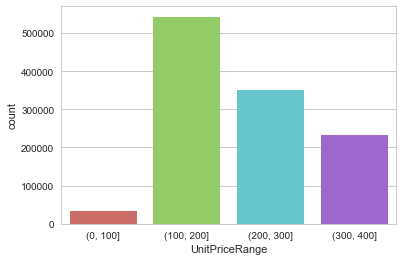

In [92]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
 
#draw bar plot
sns.countplot(x = 'UnitPriceRange', data = df_fin_new, palette = 'hls')
plt.show()

In [109]:
df_fin_sum = df_fin_new.groupby(by=['OrderGroupCode','UnitPriceRange'])['Quantity'].sum()
df_fin_sum.head()

OrderGroupCode                                                     UnitPriceRange
b" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\xc3+"                (100, 200]         1.0
b" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\xfe>\x92Q"           (200, 300]         2.0
                                                                   (300, 400]         2.0
b" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa0\xad\xc7\x88~\xee"  (100, 200]        12.0
                                                                   (200, 300]         4.0
Name: Quantity, dtype: float64

In [110]:
df_fin_one_hot = df_fin_sum.unstack().fillna(0).applymap(lambda x: 1 if x>0 else 0)
df_fin_one_hot.head()

UnitPriceRange,"(0, 100]","(100, 200]","(200, 300]","(300, 400]"
OrderGroupCode,,,,
"b"" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\xc3+""",0,1,0,0
"b"" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\xfe>\x92Q""",0,0,1,1
"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa0\xad\xc7\x88~\xee""",0,1,1,1
"b"" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\xd4t'\x12:""",0,1,1,0
"b"" ,B\xd9C\xcf*\xa1',/\xcb{\xe6\xf4z\xbd\xcc\x84\xca""",0,1,1,1


In [99]:
df_new = df_fin_new[['OrderGroupCode','UnitPriceRange','Quantity']]
df_new.head()

,OrderGroupCode,UnitPriceRange,Quantity
1,b'$\xf5LTr\x86\xaf\x1c\xbc\x8c\xed\xbcD\x9cw\x...,"(100, 200]",1.0
5,b'\xbcyi\x9cq\xff\xe4\xf8\xa8h\x7f\xf4\xfemB\x...,"(300, 400]",1.0
7,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,"(100, 200]",1.0
8,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,"(100, 200]",1.0
9,b'\xcb\xcf\xd7\xf2u\x8e\xda\xc4}\x94I\xfc\t\x8...,"(100, 200]",1.0


In [102]:
frequent_itemsets = apriori(df_new_one_hot, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values(by = 'support',ascending=False)

,support,itemsets
0,0.789525,"[(100, 200]]"
1,0.710266,"[(200, 300]]"
2,0.599614,"[(300, 400]]"
3,0.560297,"[(100, 200], (200, 300]]"
4,0.439060,"[(100, 200], (300, 400]]"
5,0.400944,"[(200, 300], (300, 400]]"
6,0.299442,"[(100, 200], (200, 300], (300, 400]]"


In [107]:
frequent_itemsets = apriori(df_new_one_hot, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules.sort_values(by = 'confidence',ascending=False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"((0, 100], (200, 300])","((100, 200])",0.062037,0.789525,0.052124,0.840212,1.064200,0.003144,1.317217
0,"((0, 100])","((100, 200])",0.090678,0.789525,0.075564,0.833316,1.055465,0.003971,1.262719
7,"((0, 100], (200, 300], (300, 400])","((100, 200])",0.030396,0.789525,0.024312,0.799843,1.013069,0.000314,1.051552
1,"((200, 300])","((100, 200])",0.710266,0.789525,0.560297,0.788855,0.999152,-0.000476,0.996829
5,"((0, 100], (300, 400])","((100, 200])",0.046407,0.789525,0.036576,0.788143,0.998251,-0.000064,0.993481
6,"((200, 300], (300, 400])","((100, 200])",0.400944,0.789525,0.299442,0.746843,0.945940,-0.017113,0.831401
3,"((300, 400])","((100, 200])",0.599614,0.789525,0.439060,0.732238,0.927441,-0.034350,0.786053
2,"((100, 200])","((200, 300])",0.789525,0.710266,0.560297,0.709663,0.999152,-0.000476,0.997925


In [105]:
rules["antecedant_len"] = rules["antecedants"].apply(lambda x: len(x))
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,"((100, 200])","((0, 100])",0.789525,0.090678,0.075564,0.095708,1.055465,0.003971,1.005562,1
1,"((0, 100])","((100, 200])",0.090678,0.789525,0.075564,0.833316,1.055465,0.003971,1.262719,1
2,"((0, 100], (200, 300])","((100, 200])",0.062037,0.789525,0.052124,0.840212,1.064200,0.003144,1.317217,2
3,"((100, 200])","((0, 100], (200, 300])",0.789525,0.062037,0.052124,0.066020,1.064200,0.003144,1.004264,1


In [106]:
rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.70) &
       (rules['lift'] > 1.05) ]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
2,"((0, 100], (200, 300])","((100, 200])",0.062037,0.789525,0.052124,0.840212,1.0642,0.003144,1.317217,2
